In [1]:
BASE_PATH = ".."
RAW_PATH = f"{BASE_PATH}/data/raw"
CLEAN_PATH = f"{BASE_PATH}/data/processed"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f"{CLEAN_PATH}/orders_reviews_engineered.csv")
df.head()

,order_id,review_score,review_category,delay_days,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,4,good,-8.0,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,4,good,-6.0,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,5,good,-18.0,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,5,good,-13.0,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,5,good,-10.0,on_time


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98410 entries, 0 to 98409
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         98410 non-null  object 
 1   review_score     98410 non-null  int64  
 2   review_category  98410 non-null  object 
 3   delay_days       95607 non-null  float64
 4   delivery_status  98410 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ MB


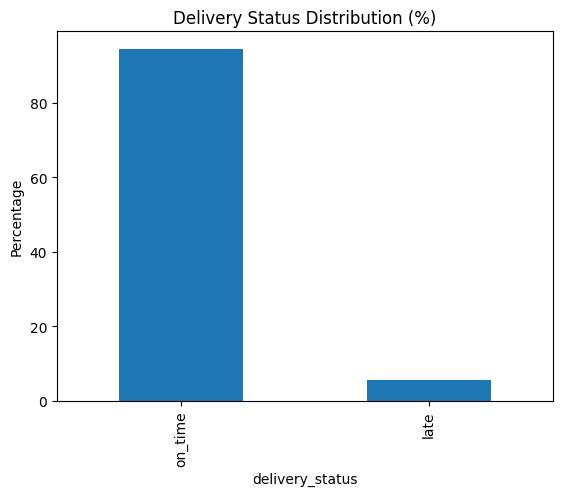

In [4]:
delivery_dist = df["delivery_status"].value_counts(normalize=True) * 100
delivery_dist.plot(kind="bar")
plt.title("Delivery Status Distribution (%)")
plt.ylabel("Percentage")
plt.show()

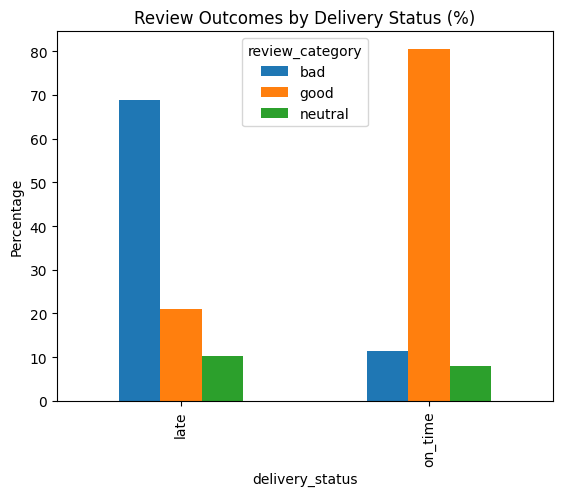

In [5]:
review_delivery_pct = pd.crosstab(
    df["delivery_status"],
    df["review_category"],
    normalize="index"
) * 100

review_delivery_pct.plot(kind="bar")
plt.title("Review Outcomes by Delivery Status (%)")
plt.ylabel("Percentage")
plt.show()

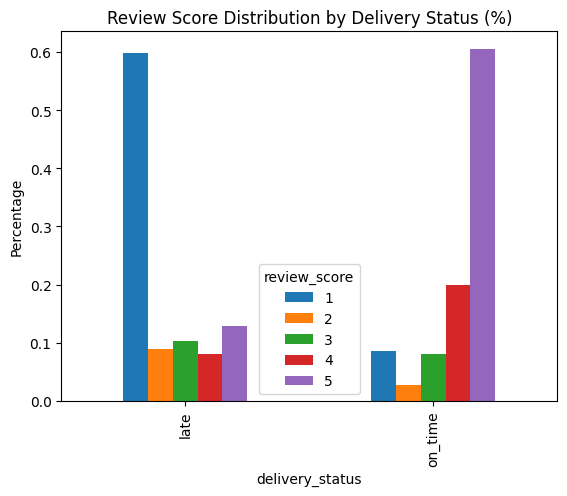

In [6]:
pd.crosstab(
    df["delivery_status"],
    df["review_score"],
    normalize="index"
).plot(kind="bar")
plt.title("Review Score Distribution by Delivery Status (%)")
plt.ylabel("Percentage")
plt.show()

### Key Insights
- Late deliveries are strongly associated with negative customer reviews. Approximately 68% of late deliveries received bad ratings (1–2 stars), whereas around 80% of on-time or early deliveries received good ratings (4–5 stars).

- Despite this strong relationship, delivery timeliness alone does not fully explain customer satisfaction. Around 11% of on-time deliveries still received poor reviews, and 21% of late deliveries were rated positively.

- This indicates that while improving delivery performance can significantly reduce negative reviews, other factors such as product quality, expectation management, and overall customer experience also play an important role.

- The visualizations largely confirm patterns observed during exploratory analysis. While no unexpected trends emerged, the charts significantly improve interpretability by clearly highlighting the contrast in review outcomes between on-time and late deliveries.

## Conclusion
Delivery performance is a key driver of customer satisfaction, with late deliveries substantially increasing the likelihood of negative reviews. Improving logistics and delivery reliability can therefore have a meaningful impact on customer perception and review outcomes.

However, since delivery timeliness does not fully account for all negative or positive reviews, businesses should also focus on product quality, accurate product descriptions, and customer support to improve overall customer experience.